In [ ]:
# !pip install 'qiskit[visualization]'
# !pip install qiskit-ibm-runtime
# !pip install python-dotenv

1. Map the problem to circuits & operators 
2. Optimize the circuit 
3. Execute it in a backend 
4. Post-process the results

## Step 1. Map the problem to circuits & operators

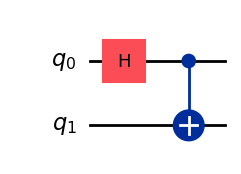

In [13]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [17]:
from qiskit.quantum_info import Pauli

ZZ = Pauli("ZZ")
ZI = Pauli("ZI")
IZ = Pauli("IZ")
XX = Pauli("XX")
XI = Pauli("XI")
IX = Pauli("IX")

observables = [ZZ, ZI, IZ, XX, XI, IX]

## Step 2. Optimize the circuits

In [15]:
from dotenv import load_dotenv
load_dotenv()
import os

# os.environ['IBM_API_KEY']

In [ ]:
# Use the following code instead if you want to run on a simulator:
 
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

# service = QiskitRuntimeService(channel="ibm_quantum", token=os.environ['IBM_API_KEY'])
# backend = service.least_busy(simulator=False, operational=True)
backend = FakeAlmadenV2()

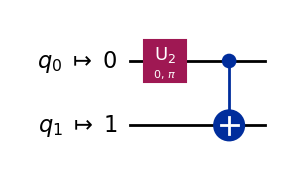

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

## Step 3. Execute using the quantum primitives

In [ ]:
# !pip install qiskit_aer

In [26]:
from qiskit_aer.primitives import Estimator
estimator = Estimator()
job = estimator.run([qc]*len(observables), observables)
job.result()

EstimatorResult(values=array([ 1.       ,  0.       ,  0.       ,  1.       , -0.0078125,
       -0.0078125]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 16, 'parallel_shots': 1, 'sample_measure_time': 0.000793298, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.001683965, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 32768, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 1.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 16, 'parallel_shots': 1, 'sample_measure_time': 0.000793298, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'C

In [ ]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

estimator = Estimator(backend)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])

# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
 
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
 
pub_result = job.result()[0]

/Users/apitchai002/Documents/Clones/2025-02-qiskit-nitw/.venv/lib/python3.10/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


## Step 4. Post-process the results

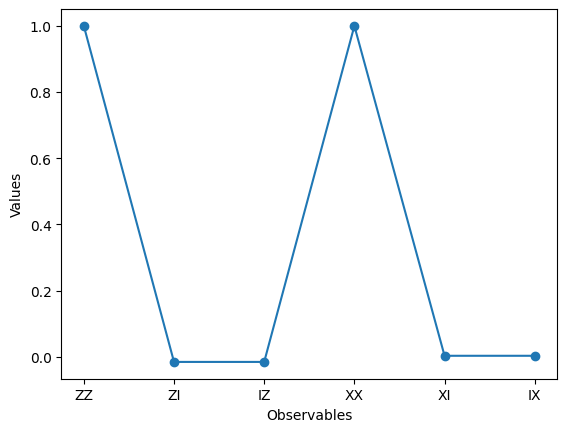

In [24]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
observables_labels = ["ZZ", "ZI", "IZ", "XX", "XI", "IX"]
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()